In [1]:
import geopandas as gpd
import pandas as pd
import shapely

In [2]:
district_plan = {1: {547,550}, 2: {552,1243}, 3: {693,532}}
district_plan_mask = {547, 550, 552, 1243, 693, 532}
arizona = gpd.read_file('data/Arizona/arizonaGeo.geojson')

,index,precinct,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,geometry
532,532,esquire,2232,1069,3301,10970,1005,4227,3857,590,628,"POLYGON ((-111.87991 33.39305, -111.88010 33.3..."
547,547,optimist,1981,1158,3139,4928,149,3303,975,179,56,"POLYGON ((-111.91124 33.36376, -111.91125 33.3..."
550,550,rotary park,1923,1215,3138,5363,198,3501,1052,216,80,"POLYGON ((-111.90919 33.38570, -111.90913 33.3..."
552,552,balboa,1983,952,2935,6165,500,3447,1345,313,228,"POLYGON ((-111.90051 33.40750, -111.90055 33.3..."
693,693,victory,1327,649,1976,4866,289,2135,1589,449,140,"POLYGON ((-111.89176 33.42931, -111.89176 33.4..."
1243,1243,shalimar,1300,790,2090,3481,155,2267,613,155,85,"POLYGON ((-111.88833 33.40752, -111.88830 33.4..."


<AxesSubplot: >

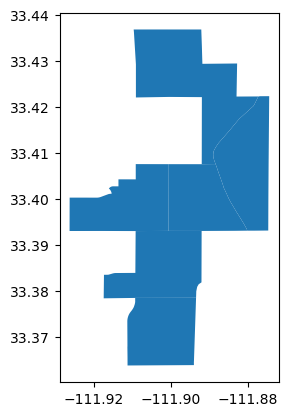

In [3]:
arizona = arizona[arizona['index'].isin(district_plan_mask)]
display(arizona)
display(arizona.plot())

In [4]:
def assignDistrict(precinct_id, district_plan):
    for district_id in district_plan:
        if(precinct_id in district_plan[district_id]):
            return district_id
    return 0

,geometry,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
district,,,,,,,,,,
1,"POLYGON ((-111.91125 33.36559, -111.91128 33.3...",3904,2373,6277,10291,347,6804,2027,395,136
2,"POLYGON ((-111.90913 33.39296, -111.91774 33.3...",3283,1742,5025,9646,655,5714,1958,468,313
3,"POLYGON ((-111.88010 33.39305, -111.88010 33.3...",3559,1718,5277,15836,1294,6362,5446,1039,768


<AxesSubplot: >

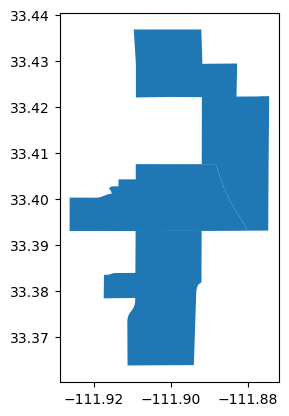

In [5]:
arizona['district'] = arizona['index'].apply(lambda precinct: assignDistrict(precinct, district_plan))
arizona.drop(["index", 'precinct'], axis = 1, inplace=True)
arizona = arizona.dissolve(by = 'district', aggfunc = 'sum')
display(arizona)
display(arizona.plot())